<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/03_Regresi%C3%B3n_Lineal/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías
###Se importan la librerias a utilizar

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

#Preparar la data
###Importamos los datos de Kaggle

https://www.kaggle.com/datasets/budincsevity/szeged-weather

In [2]:
from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download budincsevity/szeged-weather


import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

  0% 0.00/2.23M [00:00<?, ?B/s]
100% 2.23M/2.23M [00:00<00:00, 28.6MB/s]


###Entendimiento del dataset

In [3]:
df=pd.read_csv('/content/weatherHistory.csv')

In [4]:
df.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [5]:
df.shape

(96453, 12)

In [6]:
df=df.dropna(subset=['Temperature (C)', 'Humidity'])

In [7]:
df.shape

(96453, 12)

#Regresión Lineal Simple

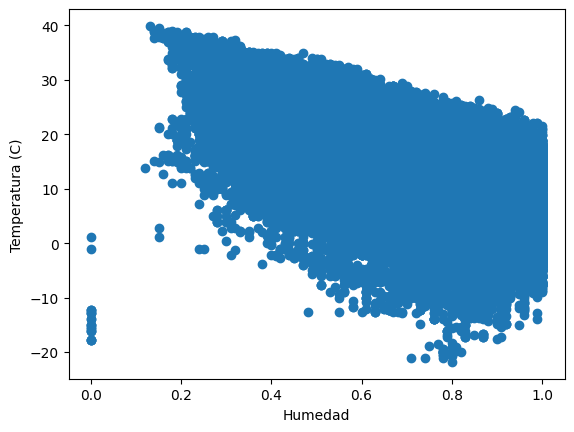

In [8]:
#Seleccionamos solamente la columna 5 del dataset
X = df.Humidity
#Defino los datos correspondientes a las etiquetas
y = df['Temperature (C)']
#Graficamos los datos correspondientes
plt.scatter(X, y)
plt.xlabel('Humedad')
plt.ylabel('Temperatura (C)')
plt.show()

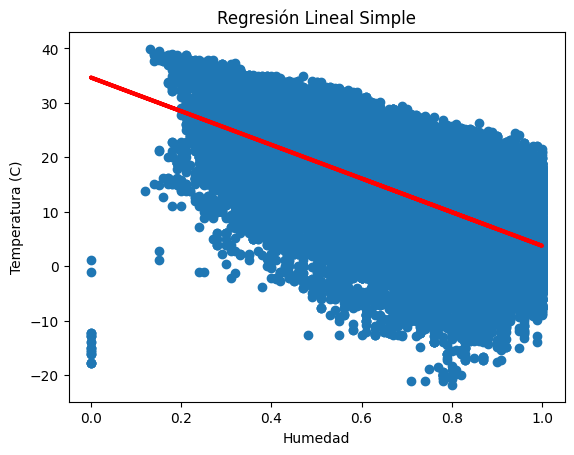

DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[-30.89438376]
Valor de la intersección o coeficiente "b":
34.63692912688962

La ecuación del modelo es igual a:
y =  [-30.89438376] x + 34.63692912688962

Precisión del modelo:
0.3997459740945124


In [9]:
X=X.values.reshape(-1,1)
lr = linear_model.LinearRegression()
lr.fit(X, y)
Yest = lr.predict(X)

plt.scatter(X, y)
plt.plot(X, Yest, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Humedad')
plt.ylabel('Temperatura (C)')
plt.show()

print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x +', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(X, y))

#Implementación con Split de Datos

In [10]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, y_train)
#Realizo una predicción
Y_pred = lr.predict(X_test)

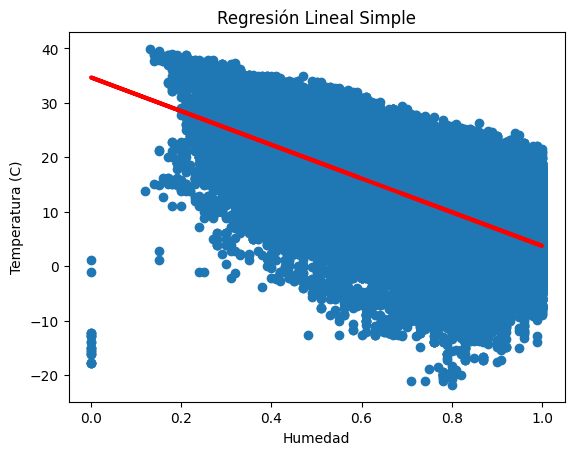


DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[-30.92963811]
Valor de la intersección o coeficiente "b":
34.66070365006988

La ecuación del modelo es igual a:
y =  [-30.92963811] x + 34.66070365006988

Precisión del modelo en train:
0.3999126878976833
Precisión del modelo en test:
0.39908086750512173


In [11]:
#Graficamos los datos junto con el modelo
plt.scatter(X, y)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Humedad')
plt.ylabel('Temperatura (C)')
plt.show()
print()
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x +', lr.intercept_)
print()
print('Precisión del modelo en train:')
print(lr.score(X_train, y_train))
print('Precisión del modelo en test:')
print(lr.score(X_test, y_test))

In [12]:
# Score de testeo
print(lr.score(X_test, y_test))

0.39908086750512173


#Implementación con StatsModel

In [13]:
import pandas as pd
import statsmodels.formula.api as smf

In [14]:
df=pd.DataFrame(data=np.column_stack((X,y)),columns=['X','y'])

formula = 'y ~ X'

lm = smf.ols(formula=formula, data=df).fit()
print(lm.params)

lm.rsquared

Intercept    34.636929
X           -30.894384
dtype: float64


0.3997459740945124

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 6.423e+04
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:19:39   Log-Likelihood:            -3.2991e+05
No. Observations:               96453   AIC:                         6.598e+05
Df Residuals:                   96451   BIC:                         6.598e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6369      0.093    373.651      0.000      34.455      34.819
X            -30.8944      0.122   -253.442      0.000     -31.133     -30.655
==============================================================================
Omnibus:                     2385.781   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2566.298
Skew:                          -0.394   Prob(JB):                         0.00
Kurtosis:                       3.131   Cond. No.                         7.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
lm.predict()
predictions = lm.params['X'] * df['X'] + lm.params['Intercept']
error = predictions - df['y']

In [17]:
A=pow(df['y']-predictions,2).sum()
B=pow(df['y']-df['y'].mean(),2).sum()
R=1-(A/B)

R

0.3997459740945124

In [18]:
R_square = (df['y'].var()-error.var())/df['y'].var()
R_square

0.3997459740945124

# Regresión Múltiple

In [19]:
df=pd.read_csv('/content/weatherHistory.csv')

In [20]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [21]:
vars=['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)']

In [22]:
X=df[vars]
lr = linear_model.LinearRegression()
lr.fit(X, y)
Yest = lr.predict(X)

In [23]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x ', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(X, y))

DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[ 8.72454852e-01 -1.42397264e+00  7.97597828e-02 -4.04975848e-04
  8.36906228e-03  0.00000000e+00 -2.04384991e-04]
Valor de la intersección o coeficiente "b":
2.8407632156753273

La ecuación del modelo es igual a:
y =  [ 8.72454852e-01 -1.42397264e+00  7.97597828e-02 -4.04975848e-04
  8.36906228e-03  0.00000000e+00 -2.04384991e-04] x  2.8407632156753273

Precisión del modelo:
0.9901283672803095


# Regresión múltiple con partición train test

In [24]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X=df[vars]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
Yest = lr.predict(X_test)

In [26]:
print(lr.score(X_train, y_train))

0.9901275882734941


In [27]:
print(lr.score(X_test, y_test))

0.9901309308638092
